In [37]:
#authors: Amelie Bauerdick
#WabnitzLab

# Import Packages

In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
import sklearn.cluster as cluster
from sklearn.cluster import KMeans 
import umap
import hdbscan

# Load CSV

In [39]:
data=pd.read_csv("path/data.csv")
data

,index_file,Area_M01,Area_M02,Area_M03,Area_M04,Area_M05,Area_M06,Area_M07,Area_M08,Area_M09,Area_M10,Area_M11,Area_M12,Area_MC,Aspect Ratio_M01,Aspect Ratio_M02,Aspect Ratio_M03,Aspect Ratio_M04,Aspect Ratio_M05,Aspect Ratio_M06,Aspect Ratio_M07,Aspect Ratio_M08,Aspect Ratio_M09,Aspect Ratio_M10,Aspect Ratio_M11,Aspect Ratio_M12,Aspect Ratio Intensity_M01_Ch01,Aspect Ratio Intensity_M02_Ch02,Aspect Ratio Intensity_M03_Ch03,Aspect Ratio Intensity_M04_Ch04,Aspect Ratio Intensity_M05_Ch05,Aspect Ratio Intensity_M06_Ch06,Aspect Ratio Intensity_M07_Ch07,Aspect Ratio Intensity_M08_Ch08,Aspect Ratio Intensity_M09_Ch09,Aspect Ratio Intensity_M10_Ch10,Aspect Ratio Intensity_M11_Ch11,Aspect Ratio Intensity_M12_Ch12,Bkgd Mean_Ch01,Bkgd Mean_Ch02,Bkgd Mean_Ch03,Bkgd Mean_Ch04,Bkgd Mean_Ch05,Bkgd Mean_Ch06,Bkgd Mean_Ch07,Bkgd Mean_Ch08,Bkgd Mean_Ch09,Bkgd Mean_Ch10,Bkgd Mean_Ch11,Bkgd Mean_Ch12,Modulation_M01_Ch01,Modulation_M02_Ch02,Modulation_M03_Ch03,Modulation_M04_Ch04,Modulation_M05_Ch05,Modulation_M06_Ch06,Modulation_M07_Ch07,Modulation_M08_Ch08,Modulation_M09_Ch09,Modulation_M10_Ch10,Modulation_M11_Ch11,Modulation_M12_Ch12,Contrast_M01_Ch01,Contrast_M02_Ch02,Contrast_M03_Ch03,Contrast_M04_Ch04,Contrast_M05_Ch05,Contrast_M06_Ch06,Contrast_M07_Ch07,Contrast_M08_Ch08,Contrast_M09_Ch09,Contrast_M10_Ch10,Contrast_M11_Ch11,Contrast_M12_Ch12,Gradient RMS_M01_Ch01,Gradient RMS_M02_Ch02,Gradient RMS_M03_Ch03,Gradient RMS_M04_Ch04,Gradient RMS_M05_Ch05,Gradient RMS_M06_Ch06,Gradient RMS_M07_Ch07,Gradient RMS_M08_Ch08,Gradient RMS_M09_Ch09,Gradient RMS_M10_Ch10,Gradient RMS_M11_Ch11,Gradient RMS_M12_Ch12,Intensity_MC_Ch01,Intensity_MC_Ch02,Intensity_MC_Ch03,Intensity_MC_Ch04,Intensity_MC_Ch05,Intensity_MC_Ch06,Intensity_MC_Ch07,Intensity_MC_Ch08,Intensity_MC_Ch09,Intensity_MC_Ch10,Intensity_MC_Ch11,Intensity_MC_Ch12,Mean Pixel_M01_Ch01,Mean Pixel_M02_Ch02,Mean Pixel_M03_Ch03,Mean Pixel_M04_Ch04,Mean Pixel_M05_Ch05,Mean Pixel_M06_Ch06,Mean Pixel_M07_Ch07,Mean Pixel_M08_Ch08,Mean Pixel_M09_Ch09,Mean Pixel_M10_Ch10,Mean Pixel_M11_Ch11,Mean Pixel_M12_Ch12,Median Pixel_M01_Ch01,Median Pixel_M02_Ch02,Median Pixel_M03_Ch03,Median Pixel_M04_Ch04,Median Pixel_M05_Ch05,Median Pixel_M06_Ch06,Median Pixel_M07_Ch07,Median Pixel_M08_Ch08,Median Pixel_M09_Ch09,Median Pixel_M10_Ch10,Median Pixel_M11_Ch11,Median Pixel_M12_Ch12,Max Pixel_MC_Ch01,Max Pixel_MC_Ch02,Max Pixel_MC_Ch03,Max Pixel_MC_Ch04,Max Pixel_MC_Ch05,Max Pixel_MC_Ch06,Max Pixel_MC_Ch07,Max Pixel_MC_Ch08,Max Pixel_MC_Ch09,Max Pixel_MC_Ch10,Max Pixel_MC_Ch11,Max Pixel_MC_Ch12,Raw Max Pixel_MC_Ch01,Raw Max Pixel_MC_Ch02,Raw Max Pixel_MC_Ch03,Raw Max Pixel_MC_Ch04,Raw Max Pixel_MC_Ch05,Raw Max Pixel_MC_Ch06,Raw Max Pixel_MC_Ch07,Raw Max Pixel_MC_Ch08,Raw Max Pixel_MC_Ch09,Raw Max Pixel_MC_Ch10,Raw Max Pixel_MC_Ch11,Raw Max Pixel_MC_Ch12,Raw Min Pixel_MC_Ch01,Raw Min Pixel_MC_Ch02,Raw Min Pixel_MC_Ch03,Raw Min Pixel_MC_Ch04,Raw Min Pixel_MC_Ch05,Raw Min Pixel_MC_Ch06,Raw Min Pixel_MC_Ch07,Raw Min Pixel_MC_Ch08,Raw Min Pixel_MC_Ch09,Raw Min Pixel_MC_Ch10,Raw Min Pixel_MC_Ch11,Raw Min Pixel_MC_Ch12,Length_M01,Length_M02,Length_M03,Length_M04,Length_M05,Length_M06,Length_M07,Length_M08,Length_M09,Length_M10,Length_M11,Length_M12,Width_M01,Width_M02,Width_M03,Width_M04,Width_M05,Width_M06,Width_M07,Width_M08,Width_M09,Width_M10,Width_M11,Width_M12,Height_M01,Height_M02,Height_M03,Height_M04,Height_M05,Height_M06,Height_M07,Height_M08,Height_M09,Height_M10,Height_M11,Height_M12,Saturation Count_M01_Ch01,Saturation Count_M02_Ch02,Saturation Count_M03_Ch03,Saturation Count_M04_Ch04,Saturation Count_M05_Ch05,Saturation Count_M06_Ch06,Saturation Count_M07_Ch07,Saturation Count_M08_Ch08,Saturation Count_M09_Ch09,Saturation Count_M10_Ch10,Saturation Count_M11_Ch11,Saturation Count_M12_Ch12,Saturation Percent_M01_Ch01,Saturation Percent_M02_Ch02,Saturation Percent_M03_Ch03,Saturation Percent_M04_Ch04,Saturation Percent_M05_Ch05,Saturation Percent_M06_Ch06,Saturation Percent_M07_Ch07,Saturation Percent_M08_Ch08,

In [40]:
list(data.columns)

['index_file',
 'Area_M01',
 'Area_M02',
 'Area_M03',
 'Area_M04',
 'Area_M05',
 'Area_M06',
 'Area_M07',
 'Area_M08',
 'Area_M09',
 'Area_M10',
 'Area_M11',
 'Area_M12',
 'Area_MC',
 'Aspect Ratio_M01',
 'Aspect Ratio_M02',
 'Aspect Ratio_M03',
 'Aspect Ratio_M04',
 'Aspect Ratio_M05',
 'Aspect Ratio_M06',
 'Aspect Ratio_M07',
 'Aspect Ratio_M08',
 'Aspect Ratio_M09',
 'Aspect Ratio_M10',
 'Aspect Ratio_M11',
 'Aspect Ratio_M12',
 'Aspect Ratio Intensity_M01_Ch01',
 'Aspect Ratio Intensity_M02_Ch02',
 'Aspect Ratio Intensity_M03_Ch03',
 'Aspect Ratio Intensity_M04_Ch04',
 'Aspect Ratio Intensity_M05_Ch05',
 'Aspect Ratio Intensity_M06_Ch06',
 'Aspect Ratio Intensity_M07_Ch07',
 'Aspect Ratio Intensity_M08_Ch08',
 'Aspect Ratio Intensity_M09_Ch09',
 'Aspect Ratio Intensity_M10_Ch10',
 'Aspect Ratio Intensity_M11_Ch11',
 'Aspect Ratio Intensity_M12_Ch12',
 'Bkgd Mean_Ch01',
 'Bkgd Mean_Ch02',
 'Bkgd Mean_Ch03',
 'Bkgd Mean_Ch04',
 'Bkgd Mean_Ch05',
 'Bkgd Mean_Ch06',
 'Bkgd Mean_Ch07',


# Rename Features

In [41]:
data.columns = data.columns.str.strip().str.replace(' ', '_')
data.columns = data.columns.str.strip().str.replace('&', 'and')
data.columns = data.columns.str.strip().str.replace('+', 'plus')
data.columns = data.columns.str.strip().str.replace('-', 'minus')
list(data.columns)

C:\Users\ameli\AppData\Local\Temp\ipykernel_37400\2204338243.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.strip().str.replace('+', 'plus')


['index_file',
 'Area_M01',
 'Area_M02',
 'Area_M03',
 'Area_M04',
 'Area_M05',
 'Area_M06',
 'Area_M07',
 'Area_M08',
 'Area_M09',
 'Area_M10',
 'Area_M11',
 'Area_M12',
 'Area_MC',
 'Aspect_Ratio_M01',
 'Aspect_Ratio_M02',
 'Aspect_Ratio_M03',
 'Aspect_Ratio_M04',
 'Aspect_Ratio_M05',
 'Aspect_Ratio_M06',
 'Aspect_Ratio_M07',
 'Aspect_Ratio_M08',
 'Aspect_Ratio_M09',
 'Aspect_Ratio_M10',
 'Aspect_Ratio_M11',
 'Aspect_Ratio_M12',
 'Aspect_Ratio_Intensity_M01_Ch01',
 'Aspect_Ratio_Intensity_M02_Ch02',
 'Aspect_Ratio_Intensity_M03_Ch03',
 'Aspect_Ratio_Intensity_M04_Ch04',
 'Aspect_Ratio_Intensity_M05_Ch05',
 'Aspect_Ratio_Intensity_M06_Ch06',
 'Aspect_Ratio_Intensity_M07_Ch07',
 'Aspect_Ratio_Intensity_M08_Ch08',
 'Aspect_Ratio_Intensity_M09_Ch09',
 'Aspect_Ratio_Intensity_M10_Ch10',
 'Aspect_Ratio_Intensity_M11_Ch11',
 'Aspect_Ratio_Intensity_M12_Ch12',
 'Bkgd_Mean_Ch01',
 'Bkgd_Mean_Ch02',
 'Bkgd_Mean_Ch03',
 'Bkgd_Mean_Ch04',
 'Bkgd_Mean_Ch05',
 'Bkgd_Mean_Ch06',
 'Bkgd_Mean_Ch07',


# Temporary Store Selected Features

In [42]:
index_file= data[['index_file']].copy()
names= data[['file_name']].copy()
number= data[['file_number']].copy()
donor= data[['donor']].copy()


# Drop Features

In [43]:
data = data.drop(columns=[
 'Area_M03',
 'Area_M04',  
 'Area_M05',
 'Area_M08',
 'Area_M09',
 'Area_M10',
 'Area_M11',
 'Area_M12',
 'Aspect_Ratio_M03',
 'Aspect_Ratio_M04',
 'Aspect_Ratio_M05',
 'Aspect_Ratio_M08',
 'Aspect_Ratio_M09',
 'Aspect_Ratio_M10',
 'Aspect_Ratio_M11',
 'Aspect_Ratio_M12',
 'Length_M03',
 'Length_M04',
 'Length_M05',
 'Length_M08',
 'Length_M09',  
 'Length_M10',
 'Length_M11',
 'Length_M12',
 'Width_M03',
 'Width_M04',   
 'Width_M05',
 'Width_M08',
 'Width_M09',
 'Width_M10', 
 'Width_M11', 
 'Width_M12',
 'Height_M03',
 'Height_M04', 
 'Height_M05',
 'Height_M08',
 'Height_M09',
 'Height_M10', 
 'Height_M11',  
 'Height_M12',  

 'Aspect_Ratio_Intensity_M03_Ch03',
 'Aspect_Ratio_Intensity_M04_Ch04',
 'Aspect_Ratio_Intensity_M05_Ch05',

 'Aspect_Ratio_Intensity_M08_Ch08',
 'Aspect_Ratio_Intensity_M09_Ch09',
 'Aspect_Ratio_Intensity_M10_Ch10',
 'Aspect_Ratio_Intensity_M11_Ch11',
 'Aspect_Ratio_Intensity_M12_Ch12', 
 'Bkgd_Mean_Ch03',
 'Bkgd_Mean_Ch04',
 'Bkgd_Mean_Ch05',
 'Bkgd_Mean_Ch08',
 'Bkgd_Mean_Ch09',
 'Bkgd_Mean_Ch10',
 'Bkgd_Mean_Ch11',
 'Bkgd_Mean_Ch12',
 'Modulation_M01_Ch01',
 'Modulation_M02_Ch02',
 'Modulation_M03_Ch03',
 'Modulation_M04_Ch04',
 'Modulation_M05_Ch05',
 'Modulation_M06_Ch06',
 'Modulation_M07_Ch07',   
 'Modulation_M08_Ch08',
 'Modulation_M09_Ch09',
 'Modulation_M10_Ch10',
 'Modulation_M11_Ch11',
 'Modulation_M12_Ch12',
 'Contrast_M03_Ch03',
 'Contrast_M04_Ch04',
 'Contrast_M05_Ch05',
 'Contrast_M08_Ch08',
 'Contrast_M09_Ch09',
 'Contrast_M10_Ch10',
 'Contrast_M11_Ch11',
 'Contrast_M12_Ch12',
 'Gradient_RMS_M03_Ch03',
 'Gradient_RMS_M04_Ch04',
 'Gradient_RMS_M05_Ch05',
 'Gradient_RMS_M08_Ch08',
 'Gradient_RMS_M09_Ch09',
 'Gradient_RMS_M10_Ch10',
 'Gradient_RMS_M11_Ch11',
 'Gradient_RMS_M12_Ch12',
 'Intensity_MC_Ch03',
 'Intensity_MC_Ch04',
 'Intensity_MC_Ch05',
 'Intensity_MC_Ch08',
 'Intensity_MC_Ch09',
 'Intensity_MC_Ch10', 
 'Intensity_MC_Ch11',
 'Intensity_MC_Ch12',
 'Mean_Pixel_M03_Ch03',
 'Mean_Pixel_M04_Ch04',
 'Mean_Pixel_M05_Ch05',
 'Mean_Pixel_M08_Ch08',
 'Mean_Pixel_M09_Ch09',
 'Mean_Pixel_M10_Ch10',
 'Mean_Pixel_M11_Ch11',
 'Mean_Pixel_M12_Ch12',
 'Median_Pixel_M03_Ch03',
 'Median_Pixel_M04_Ch04',
 'Median_Pixel_M05_Ch05',
 'Median_Pixel_M08_Ch08',
 'Median_Pixel_M09_Ch09',
 'Median_Pixel_M10_Ch10',
 'Median_Pixel_M11_Ch11',
 'Median_Pixel_M12_Ch12',
 'Max_Pixel_MC_Ch03',
 'Max_Pixel_MC_Ch04',
 'Max_Pixel_MC_Ch05',
 'Max_Pixel_MC_Ch08',
 'Max_Pixel_MC_Ch09',
 'Max_Pixel_MC_Ch10',
 'Max_Pixel_MC_Ch11',
 'Max_Pixel_MC_Ch12',
 'Raw_Max_Pixel_MC_Ch03',
 'Raw_Max_Pixel_MC_Ch04',
 'Raw_Max_Pixel_MC_Ch05',
 'Raw_Max_Pixel_MC_Ch08',
 'Raw_Max_Pixel_MC_Ch09',
 'Raw_Max_Pixel_MC_Ch10',
 'Raw_Max_Pixel_MC_Ch11',
 'Raw_Max_Pixel_MC_Ch12',
 'Raw_Min_Pixel_MC_Ch01',
 'Raw_Min_Pixel_MC_Ch02',
 'Raw_Min_Pixel_MC_Ch03',
 'Raw_Min_Pixel_MC_Ch04',
 'Raw_Min_Pixel_MC_Ch05',
 'Raw_Min_Pixel_MC_Ch06',
 'Raw_Min_Pixel_MC_Ch07',
 'Raw_Min_Pixel_MC_Ch08',
 'Raw_Min_Pixel_MC_Ch09',
 'Raw_Min_Pixel_MC_Ch10',
 'Raw_Min_Pixel_MC_Ch11',
 'Raw_Min_Pixel_MC_Ch12',
 'Saturation_Count_M01_Ch01',
 'Saturation_Count_M02_Ch02',
 'Saturation_Count_M03_Ch03',
 'Saturation_Count_M04_Ch04',
 'Saturation_Count_M05_Ch05',
 'Saturation_Count_M06_Ch06',
 'Saturation_Count_M07_Ch07',
 'Saturation_Count_M08_Ch08',
 'Saturation_Count_M09_Ch09',
 'Saturation_Count_M10_Ch10',
 'Saturation_Count_M11_Ch11',
 'Saturation_Count_M12_Ch12',
 'Saturation_Percent_M01_Ch01',
 'Saturation_Percent_M02_Ch02',
 'Saturation_Percent_M03_Ch03',
 'Saturation_Percent_M04_Ch04',
 'Saturation_Percent_M05_Ch05',
 'Saturation_Percent_M06_Ch06',
 'Saturation_Percent_M07_Ch07',
 'Saturation_Percent_M08_Ch08',
 'Saturation_Percent_M09_Ch09',
 'Saturation_Percent_M10_Ch10',
 'Saturation_Percent_M11_Ch11',
 'Saturation_Percent_M12_Ch12',
 'Bright_Detail_Similarity_R3_MC_Ch03_Ch05',
 'Bright_Detail_Similarity_R3_M01_Ch04_Ch05',
 'Bright_Detail_Colocalization_3_MC_Ch03_Ch04_Ch05',
 'Bright_Detail_Intensity_R3_MC_Ch03',
 'Bright_Detail_Intensity_R3_MC_Ch04',
 'Bright_Detail_Intensity_R3_MC_Ch05',
 'Bright_Detail_Intensity_R3_MC_Ch08',
 'Bright_Detail_Intensity_R3_MC_Ch09',
 'Bright_Detail_Intensity_R3_MC_Ch10',
 'Bright_Detail_Intensity_R3_MC_Ch11',
 'Bright_Detail_Intensity_R3_MC_Ch12',
 'Time',
 'Object_Number',
 'Raw_Centroid_X',
 'Raw_Centroid_Y',
 'Flow_Speed',
 'Max_Pixel_Surface_Ch03',
 'Max_Pixel_Surface_Ch04',
 'Max_Pixel_Surface_Ch11',
 'Max_Pixel_Intracellular_Ch04',
 'Max_Pixel_Surface_Ch04_minus_Max_Pixel_Intracellular_Ch04',
 'Max_Pixel_Surface_Ch04_/_Max_Pixel_Intracellular_Ch04',
 'Internalization_Intracellular_Ch05',
 'Intensity_Surface_Ch04_/_Intensity_MC_Ch04',
 'Intensity_Surface_Ch11_/_Intensity_MC_Ch11',
 'Intensity_MC_Ch11_minus_Bkgd_Mean_Ch11',
 'Bright_Detail_Intensity_R3_Surface_Ch11',
 'Max_Pixel_Surface_Ch03_/_Max_Pixel_MC_Ch03',
 'Intensity_Surface_Ch03',
 'Intensity_Surface_Ch04',
 'Intensity_Surface_Ch05',
 'Intensity_Surface_Ch11',
 'Aspect_Ratio_Intensity_Inspire(M07__Ch07)_Ch02',
 'Aspect_Ratio_Intensity_Inspire(M01__Ch01)_Ch02',
 'Aspect_Ratio_Intensity_Inspire(M07__Ch07)_Ch07',
 'Bright_Detail_Similarity_R3_MC_Ch04_Ch05',
 'Mean_Pixel_Morphology(M07__Ch07)_Ch07',
 'Area_Inspire(M01__Ch01)_minus_Area_Inspire(M07__Ch07)',
 'Insp_cytoplasm_index',  
 'Bright_Detail_Similarity_R3_MC_Ch03_Ch04',
 'Bright_Detail_Colocalization_3_MC_Ch03_Ch04_Ch06',
 'Bright_Detail_Similarity_R3_MC_Ch03_Ch06',
 'Bright_Detail_Similarity_R3_MC_Ch04_Ch06',   
 'CDD6_on_surface_(%)',
 'Internalization_Intracellular_Ch03',
 'Internalization_Intracellular_Ch04',
 'Internalization_Intracellular_Ch02',
 'Internalization_Intracellular_Ch07',
 'Circularity_Morphology(M07__Ch07)_/_Intensity_Surface_Ch03',
 'Bright_Detail_Similarity_R3_MC_Ch04_Ch11',
 'Internalization_Intracellular_Ch11',
 'Delta_Centroid_XY_MC_Ch01_IntensityWeighted_MC_Ch01',   
 'Area_M01_/_Bright_Detail_Intensity_R7_M07_Ch07',
 'Delta_Centroid_XY_MC_Ch07_IntensityWeighted_MC_Ch07',
 'Contrast_Surface_Ch01',
 'Delta_Centroid_XY_MC_Ch01_M02_Ch02_IntensityWeighted',
 'Area_Component(1__Area__Peak(M07__Ch07__Bright__0)__Descending)',
 'Delta_Centroid_XY_Intesity_Weighted_Actin',
 'H_Variance_Mean_Inspire(M01__Ch01)_Ch02_3',
 'Ensquared_Energy_Ch02_4',
 'H_Entropy_Mean_Inspire(M01__Ch01)_Ch02_3',
 'Area_Threshold(M07__Ch07__40)',
 'Circularity_Threshold(M07__Ch07__40)',
 'Compactness_Threshold(M07__Ch07__40)_Ch07',
 'Diameter_Threshold(M07__Ch07__40)',
 'Elongatedness_Threshold(M07__Ch07__40)',
 'Symmetry_2_Threshold(M07__Ch07__40)_Ch07',
 'Symmetry_3_Threshold(M07__Ch07__40)_Ch07',
 'Circularity_AdaptiveErode(M01__Ch01__95)',
 'Spot_Distance_Min_Threshold(M07__Ch07__40)',
 'Spot_Area_Min_Threshold(M07__Ch07__40)',
 'Area_Inspire(M07__Ch07)',
 'Area_System(M07__Ch07__39)',
 'Area_Inspire(M01__Ch01)',
 'cytoplasmic_size_Insp',
 'Circularity_Inspire(M07__Ch07)',
 'Symmetry_2_Inspire(M01__Ch01)_Ch01',
 'Symmetry_3_Inspire(M01__Ch01)_Ch01',
 'Lobe_Count_Inspire(M01__Ch01)_Ch01',
 'Spot_Count_Inspire(M01__Ch01)_8',
 'Compactness_Inspire(M01__Ch01)_Ch02',
 'Shape_Ratio_Inspire(M07__Ch07)',
 'Aspect_Ratio_Inspire(M07__Ch07)',
 'Aspect_Ratio_Inspire(M01__Ch01)',
 'Shape_Ratio_Inspire(M02__Ch02)',        
 'All',
 'PMN',
 'Singlets',
 'Cytoplasts_and_PMN',
 'donor',
 'file_number',
 'file_name',
 'index_file', 
 'Area_Morphology(M07__Ch07)',
 'Area_Morphology(M01__Ch01)' 
 ])

In [44]:
list(data.columns)

['Area_M01',
 'Area_M02',
 'Area_M06',
 'Area_M07',
 'Area_MC',
 'Aspect_Ratio_M01',
 'Aspect_Ratio_M02',
 'Aspect_Ratio_M06',
 'Aspect_Ratio_M07',
 'Aspect_Ratio_Intensity_M01_Ch01',
 'Aspect_Ratio_Intensity_M02_Ch02',
 'Aspect_Ratio_Intensity_M06_Ch06',
 'Aspect_Ratio_Intensity_M07_Ch07',
 'Bkgd_Mean_Ch01',
 'Bkgd_Mean_Ch02',
 'Bkgd_Mean_Ch06',
 'Bkgd_Mean_Ch07',
 'Contrast_M01_Ch01',
 'Contrast_M02_Ch02',
 'Contrast_M06_Ch06',
 'Contrast_M07_Ch07',
 'Gradient_RMS_M01_Ch01',
 'Gradient_RMS_M02_Ch02',
 'Gradient_RMS_M06_Ch06',
 'Gradient_RMS_M07_Ch07',
 'Intensity_MC_Ch01',
 'Intensity_MC_Ch02',
 'Intensity_MC_Ch06',
 'Intensity_MC_Ch07',
 'Mean_Pixel_M01_Ch01',
 'Mean_Pixel_M02_Ch02',
 'Mean_Pixel_M06_Ch06',
 'Mean_Pixel_M07_Ch07',
 'Median_Pixel_M01_Ch01',
 'Median_Pixel_M02_Ch02',
 'Median_Pixel_M06_Ch06',
 'Median_Pixel_M07_Ch07',
 'Max_Pixel_MC_Ch01',
 'Max_Pixel_MC_Ch02',
 'Max_Pixel_MC_Ch06',
 'Max_Pixel_MC_Ch07',
 'Raw_Max_Pixel_MC_Ch01',
 'Raw_Max_Pixel_MC_Ch02',
 'Raw_Max_Pi

# Normalization

In [45]:
def minmax_norm(df_input):
   return (df_input - df_input.min()) / ( df_input.max() - df_input.min())

In [46]:
data= minmax_norm(data)

In [47]:
pd.set_option('display.max_columns', None)

In [48]:
data

,Area_M01,Area_M02,Area_M06,Area_M07,Area_MC,Aspect_Ratio_M01,Aspect_Ratio_M02,Aspect_Ratio_M06,Aspect_Ratio_M07,Aspect_Ratio_Intensity_M01_Ch01,Aspect_Ratio_Intensity_M02_Ch02,Aspect_Ratio_Intensity_M06_Ch06,Aspect_Ratio_Intensity_M07_Ch07,Bkgd_Mean_Ch01,Bkgd_Mean_Ch02,Bkgd_Mean_Ch06,Bkgd_Mean_Ch07,Contrast_M01_Ch01,Contrast_M02_Ch02,Contrast_M06_Ch06,Contrast_M07_Ch07,Gradient_RMS_M01_Ch01,Gradient_RMS_M02_Ch02,Gradient_RMS_M06_Ch06,Gradient_RMS_M07_Ch07,Intensity_MC_Ch01,Intensity_MC_Ch02,Intensity_MC_Ch06,Intensity_MC_Ch07,Mean_Pixel_M01_Ch01,Mean_Pixel_M02_Ch02,Mean_Pixel_M06_Ch06,Mean_Pixel_M07_Ch07,Median_Pixel_M01_Ch01,Median_Pixel_M02_Ch02,Median_Pixel_M06_Ch06,Median_Pixel_M07_Ch07,Max_Pixel_MC_Ch01,Max_Pixel_MC_Ch02,Max_Pixel_MC_Ch06,Max_Pixel_MC_Ch07,Raw_Max_Pixel_MC_Ch01,Raw_Max_Pixel_MC_Ch02,Raw_Max_Pixel_MC_Ch06,Raw_Max_Pixel_MC_Ch07,Length_M01,Length_M02,Length_M06,Length_M07,Width_M01,Width_M02,Width_M06,Width_M07,Height_M01,Height_M02,Height_M06,Height_M07,Bright_Detail_Intensity_R3_MC_Ch01,Bright_Detail_Intensity_R3_MC_Ch02,Bright_Detail_Intensity_R3_MC_Ch06,Bright_Detail_Intensity_R3_MC_Ch07,Intensity_Surface_Ch07,Circularity_Morphology(M07__Ch07),Delta_Centroid_XY,Bright_Detail_Intensity_R7_M07_Ch07,Circularity_M01,Diameter_M01,Perimeter_M01,Symmetry_3_M01_Ch07,Ratio_cell/nucleus,Intensity_Cortical_Ch02,Intensity_nuclear_actin,Lobe_Count_Morphology(M07__Ch07)_Ch07,Major_Axis_MC,Cytoplasmic_size,Similarity_MC_Ch02_Ch07,Circularity_MC,Major_Axis_M02,Intensity_Cortical_F_actin,Intensity_Nuclear_f_actin,Cortical_F_actin_(%),Nuclear_F_actin,Shape_Ratio_M01,Area_Cytoplasm
0,0.342516,0.164913,0.193473,0.212997,0.157543,0.935770,0.895592,0.742653,0.828787,0.703990,0.825993,0.798492,0.715757,0.604138,0.599232,0.065598,0.372618,0.044191,0.023304,0.215817,0.007457,0.544574,0.318860,0.420563,0.157295,0.596682,0.012906,0.288513,0.131143,0.748600,0.007792,0.140540,0.086077,0.593170,0.006607,0.177900,0.088866,0.051172,0.013572,0.468390,0.060661,0.053170,0.014713,0.467622,0.061509,0.160920,0.092715,0.175676,0.33,0.425926,0.373134,0.338710,0.528302,0.160920,0.274510,0.250000,0.33,0.201782,0.004951,0.266395,0.046576,0.087584,0.139282,0.084830,0.060251,0.298490,0.437206,0.330798,0.260345,0.006064,0.024726,0.010599,0.75,0.125297,0.446483,0.541080,0.303220,0.266270,0.024726,0.010599,0.355827,0.663860,0.788925,0.207749
1,0.250000,0.226614,0.172203,0.194389,0.116379,0.899479,0.927894,0.797395,0.843540,0.792511,0.864549,0.758898,0.731591,0.610701,0.636437,0.060893,0.358632,0.194926,0.021169,0.323670,0.012081,0.832664,0.290436,0.446887,0.175751,0.583088,0.018538,0.268916,0.142401,0.734939,0.013390,0.151945,0.116848,0.464514,0.011506,0.259694,0.119169,0.112981,0.015403,0.321578,0.083364,0.115031,0.016675,0.320706,0.084094,0.137931,0.109272,0.148649,0.32,0.351852,0.447761,0.338710,0.509434,0.137931,0.323529,0.211538,0.32,0.359706,0.008561,0.256278,0.067169,0.098097,0.118166,0.043480,0.070440,0.364627,0.335837,0.277567,0.107960,0.006711,0.030810,0.013581,0.50,0.099855,0.402519,0.444675,0.445205,0.306111,0.030810,0.013581,0.361942,0.651573,0.780524,0.190381
2,0.351871,0.227182,0.303613,0.286001,0.187716,0.916088,0.912654,0.740706,0.853506,0.925684,0.888108,0.616453,0.840596,0.602855,0.604854,0.089059,0.362494,0.196944,0.006703,0.283388,0.056136,0.777618,0.194544,0.460336,0.233964,0.487874,0.037288,0.600108,0.076641,0.685656,0.033565,0.185431,0.031938,0.515680,0.030934,0.284952,0.032259,0.110705,0.031732,0.675473,0.028500,0.112474,0.032859,0.674942,0.029313,0.160920,0.102649,0.236486,0.36,0.425926,0.462687,0.435484,0.660377,0.160920,0.303922,0.336538,0.36,0.521177,0.006693,0.538453,0.115634,0.057374,0.131806,0.097313,0.016203,0.427305,0.446998,0.323194,0.050157,0.005269,0.041338,0.043949,0.25,0.169934,0.468694,0.695740,0.222265,0.308978,0.041338,0.043949,0.356321,0.667313,0.889737,0.408150
3,0.357588,0.234291,0.164044,0.098769,0.146121,0.911297,0.945467,0.568358,0.966592,0.688316,0.835194,0.614346,0.954202,0.604577,0.661849,0.043411,0.

# DensMAP

In [49]:
reducer = umap.UMAP(densmap=True, 
                    dens_lambda=1, 
                    n_neighbors=20,
                    min_dist=0.5,
                    metric='euclidean')

In [50]:
%time embedding = reducer.fit_transform(data)

CPU times: total: 7min 46s
Wall time: 2min 2s


In [51]:
embedding.shape

(63000, 2)

In [52]:
x = embedding[:, 0]
y =  embedding[:, 1]

In [53]:
data['x']=x
data['y']=y

# Decision Tree for DensMAP-1

In [59]:
data1=data.copy()
data1=data1.drop('y',axis=1)

# Split Data

In [60]:
train_df, test_df = train_test_split(data1, test_size=0.2, random_state=42)

# dependent variable -> x
X_train = train_df.drop('x', axis=1)
y_train = train_df['x']
X_test = test_df.drop('x', axis=1)
y_test = test_df['x']

print("length of data for training:", len(X_train))
print("length of data for testing:", len(X_test))

length of data for training: 50400
length of data for testing: 12600


# RandomForestRegressor

In [61]:
# run RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# predict dependent variable
y_pred = model.predict(X_test)

# r²-value calculation
r2 = r2_score(y_test, y_pred)
print("r² Score:", r2)

r² Score: 0.9925393998035783


# Feature Importance

In [62]:
#save importance
importance = model.feature_importances_

# sort features according to importance
s_id = np.argsort(importance)
pos = np.arange(s_id.shape[0])

# MinMax scaling
scaler = MinMaxScaler()
importance_scaled = scaler.fit_transform(importance.reshape(-1, 1)).flatten()

#importance 
total_importance = np.sum(importance_scaled)
percentage_importance = (importance_scaled / total_importance) * 100

# show top ten
top_n = 10
s_id = s_id[-top_n:]
features = pd.DataFrame({'index1': np.array(X_train.columns)[s_id], 'importance_normalized': importance_scaled[s_id], 'percentage_importance': percentage_importance[s_id]})

features

,index1,importance_normalized,percentage_importance
0,Contrast_M07_Ch07,0.002831,0.254228
1,Major_Axis_MC,0.003091,0.277565
2,Raw_Max_Pixel_MC_Ch06,0.003656,0.328308
3,Median_Pixel_M07_Ch07,0.005407,0.485500
4,Aspect_Ratio_Intensity_M06_Ch06,0.005626,0.505151
5,Max_Pixel_MC_Ch06,0.006706,0.602133
6,Max_Pixel_MC_Ch07,0.008556,0.768232
7,Lobe_Count_Morphology(M07__Ch07)_Ch07,0.015107,1.356462
8,Shape_Ratio_M01,0.042560,3.821526
9,Bkgd_Mean_Ch02,1.000000,89.791493


# Plot Feature Importance

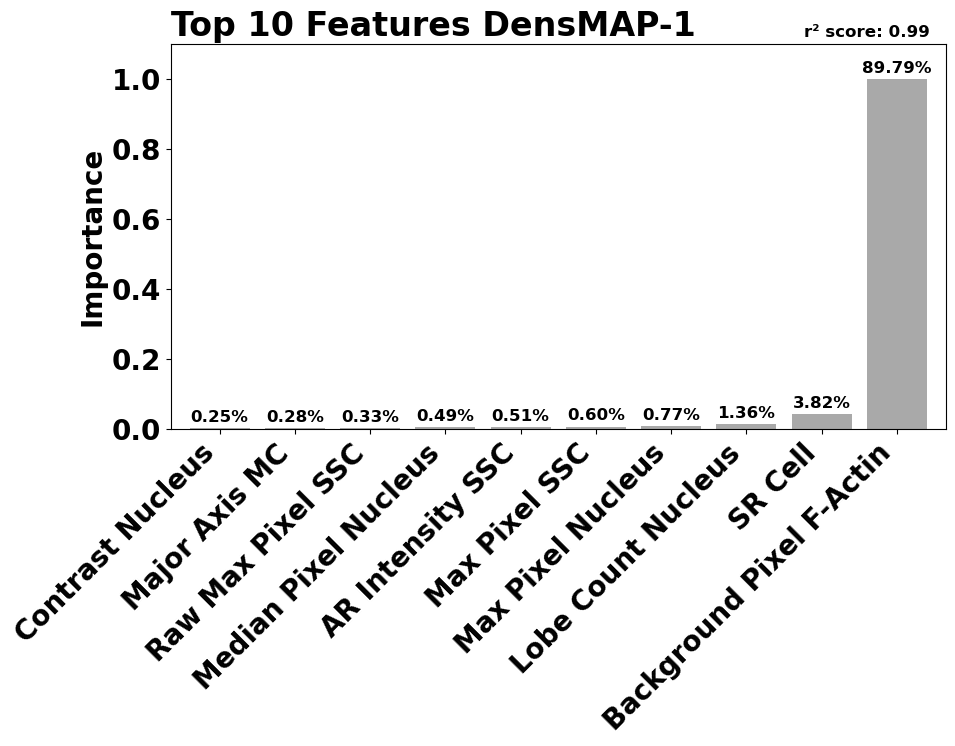

In [63]:
# rename features
row_labels = {
    'Area_M01': 'Area Cell',
    'Area_Morphology(M01__Ch01)': 'Area Cell',
    'Diameter_M01': 'Cell Diameter',
    'Width_M01':'Width Cell',
    'Length_M01': 'Length Cell',
    'Height_M01': 'Height Cell',
    'Aspect_Ratio_M01': 'AR Cell',
    'Shape_Ratio_M01':'SR Cell',
    'Circularity_M01':'Circularity Cell',
    'Circularity_AdaptiveErode(M01__Ch01__95)': 'Circularity Cell',
    'Perimeter_M01':'Perimeter Cell',
    
    'Cytoplasmic_size': 'Cytoplasmic Size',
    'Area_Cytoplasm': 'Area Cytoplasm',
    'Area_MC': 'Area MC',
    'Circularity_MC':'Circularity MC',
    'Major_Axis_MC':'Major Axis MC',
    'Bkgd_Mean_Ch02':'Background Pixel F-Actin',
    
    'Height_M02': 'Height F-Actin',
    'Length_M02': 'Length F-Actin',
    
    'Max_Pixel_MC_Ch06':'Max Pixel SSC',
    'Raw_Max_Pixel_MC_Ch06':'Raw Max Pixel SSC',
    'Aspect_Ratio_Intensity_M06_Ch06':'AR Intensity SSC',
    
    'Area_Morphology(M07__Ch07)': 'Area Nucleus',
    'Length_M07': 'Length Nucleus',
    'Height_M07': 'Height Nucleus',
    'Shape_Ratio_Morphology(M07__Ch07)': 'SR Nucleus',
    'Circularity_Morphology(M07__Ch07)': 'Circularity Nucleus',
    'Area_M07': 'Area Nucleus',
    'Aspect_Ratio_M07': 'AR Nucleus',
    'Lobe_Count_Morphology(M07__Ch07)_Ch07':'Lobe Count Nucleus',
    'Intensity_MC_Ch07':'Intensity Nucleus',
    'Max_Pixel_MC_Ch07':'Max Pixel Nucleus',
    'Bright_Detail_Intensity_R7_M07_Ch07': 'Bright Spots Intensity 7 Nucleus',
    'Bright_Detail_Intensity_R3_MC_Ch07':'Bright Spots Intensity 3 Nucleus',
    'Mean_Pixel_M07_Ch07':'Mean Pixel Nucleus',
    'Median_Pixel_M07_Ch07':'Median Pixel Nucleus',
    'Contrast_M07_Ch07':'Contrast Nucleus'
}

features['index1'] = features['index1'].map(row_labels)

ax = features.plot.bar(x='index1', y='importance_normalized', color='darkgray', legend=False, figsize=(10,5), width=0.8, fontsize=20)
plt.xlabel('')
plt.ylabel('Importance', fontsize=20)

# position percentage values
for i, v in enumerate(features['percentage_importance']):
    if features['importance_normalized'][i] + 0.01 > 1.1:
        text_height = 1
    else:
        text_height = features['importance_normalized'][i] + 0.01
    ax.text(i, text_height, f'{v:.1f}%', ha='center', va='bottom', fontsize=16, color='black')

plt.title(f'Top 10 Features DensMAP-1', fontsize=30, loc='left')
# add r2 value
#plt.text(0.98, 1.03, f'r² score: {r2:.2f}', horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, fontsize=12, fontweight='normal')
plt.ylim(0, 1.1) 
plt.xticks(rotation=45, ha='right')

plt.savefig('png/TTDensMAP1_Int.png', dpi=300, bbox_inches = 'tight')

plt.show()

# Decision Tree for DensMAP-2

In [64]:
data2=data.copy()
data2=data2.drop('x',axis=1)

# Split Data

In [65]:
train_df, test_df = train_test_split(data2, test_size=0.2, random_state=42)

# dependent variable -> y
X_train = train_df.drop('y', axis=1)
y_train = train_df['y']
X_test = test_df.drop('y', axis=1)
y_test = test_df['y']

print("length of data for training:", len(X_train))
print("length of data for testing:", len(X_test))

length of data for training: 50400
length of data for testing: 12600


# RandomForestRegressor

In [66]:
# run RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# predict dependent variable
y_pred = model.predict(X_test)

# r²-value calculation
r2 = r2_score(y_test, y_pred)
print("r² score:", r2)

r² score: 0.9694346052401107


# Feature Importance

In [67]:
#save importance
importance = model.feature_importances_

# sort features according to importance
s_id = np.argsort(importance)
pos = np.arange(s_id.shape[0])

# MinMax scaling
scaler = MinMaxScaler()
importance_scaled = scaler.fit_transform(importance.reshape(-1, 1)).flatten()

#importance 
total_importance = np.sum(importance_scaled)
percentage_importance = (importance_scaled / total_importance) * 100

# show top ten
top_n = 10
s_id = s_id[-top_n:]
features = pd.DataFrame({'index1': np.array(X_train.columns)[s_id], 'importance_normalized': importance_scaled[s_id], 'percentage_importance': percentage_importance[s_id]})

features

,index1,importance_normalized,percentage_importance
0,Circularity_M01,0.006018,0.368416
1,Mean_Pixel_M02_Ch02,0.010089,0.617605
2,Raw_Max_Pixel_MC_Ch06,0.012519,0.766401
3,Max_Pixel_MC_Ch06,0.015331,0.938509
4,Bkgd_Mean_Ch02,0.019150,1.172343
5,Median_Pixel_M07_Ch07,0.020299,1.242634
6,Shape_Ratio_M01,0.050820,3.111072
7,Intensity_MC_Ch07,0.093943,5.750931
8,Mean_Pixel_M07_Ch07,0.313021,19.162360
9,Lobe_Count_Morphology(M07__Ch07)_Ch07,1.000000,61.217552


# Plot Feature Importance

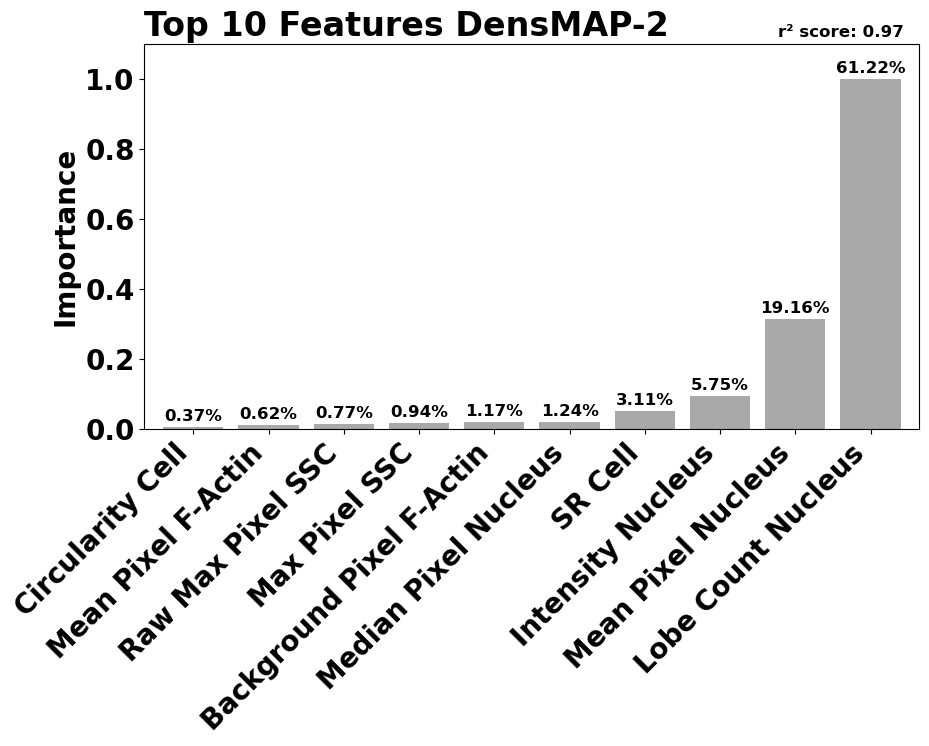

In [68]:
# rename features
row_labels = {
    'Area_M01': 'Area Cell',
    'Area_Morphology(M01__Ch01)': 'Area Cell',
    'Diameter_M01': 'Cell Diameter',
    'Width_M01':'Width Cell',
    'Length_M01': 'Length Cell',
    'Height_M01': 'Height Cell',
    'Aspect_Ratio_M01': 'AR Cell',
    'Shape_Ratio_M01':'SR Cell',
    'Perimeter_M01':'Perimeter Cell',
    'Circularity_M01':'Circularity Cell',
    'Circularity_AdaptiveErode(M01__Ch01__95)': 'Circularity Cell',
    
    'Cytoplasmic_size': 'Cytoplasmic Size',
    'Area_Cytoplasm': 'Area Cytoplasm',
    'Area_MC': 'Area MC',
    'Circularity_MC':'Circularity MC',
    'Major_Axis_MC':'Major Axis MC', 
    
    'Height_M02': 'Height F-Actin',
    'Length_M02': 'Length F-Actin',
    'Width_M02':'Width F-Actin',
    'Aspect_Ratio_M02':'AR F-Actin',
    'Bkgd_Mean_Ch02':'Background Pixel F-Actin',
    'Mean_Pixel_M02_Ch02':'Mean Pixel F-Actin',
    
    'Max_Pixel_MC_Ch06':'Max Pixel SSC',
    'Raw_Max_Pixel_MC_Ch06':'Raw Max Pixel SSC',
    
    'Area_Morphology(M07__Ch07)': 'Area Nucleus',
    'Length_M07': 'Length Nucleus',
    'Height_M07': 'Height Nucleus',
    'Shape_Ratio_Morphology(M07__Ch07)': 'SR Nucleus',
    'Circularity_Morphology(M07__Ch07)': 'Circularity Nucleus',
    'Area_M07': 'Area Nucleus',
    'Aspect_Ratio_M07': 'AR Nucleus',
    'Lobe_Count_Morphology(M07__Ch07)_Ch07':'Lobe Count Nucleus',
    'Mean_Pixel_M07_Ch07':'Mean Pixel Nucleus',
    'Intensity_MC_Ch07':'Intensity Nucleus',
    'Median_Pixel_M07_Ch07':'Median Pixel Nucleus',
}

features['index1'] = features['index1'].map(row_labels)

ax = features.plot.bar(x='index1', y='importance_normalized', color='darkgray', legend=False, figsize=(10,5), width=0.8, fontsize=20)
plt.xlabel('')
plt.ylabel('Importance', fontsize=20)

# position percentage values
for i, v in enumerate(features['percentage_importance']):
    if features['importance_normalized'][i] + 0.01 > 1.1:
        text_height = 1
    else:
        text_height = features['importance_normalized'][i] + 0.01
    ax.text(i, text_height, f'{v:.1f}%', ha='center', va='bottom', fontsize=12, color='black')

plt.title(f'Top 10 Features DensMAP-2', fontsize=30, loc='left')
# add r2 value
#plt.text(0.98, 1.03, f'r² score: {r2:.2f}', horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, fontsize=12, fontweight='normal')
plt.ylim(0, 1.1) 
plt.xticks(rotation=45, ha='right')

plt.savefig('png/TTDensMAP2_Int.png', dpi=300, bbox_inches = 'tight')

plt.show()

# Concatenate Features

In [69]:
frames=[data,names,index_file,donor,number]
data=pd.concat(frames, axis=1)
data

,Area_M01,Area_M02,Area_M06,Area_M07,Area_MC,Aspect_Ratio_M01,Aspect_Ratio_M02,Aspect_Ratio_M06,Aspect_Ratio_M07,Aspect_Ratio_Intensity_M01_Ch01,Aspect_Ratio_Intensity_M02_Ch02,Aspect_Ratio_Intensity_M06_Ch06,Aspect_Ratio_Intensity_M07_Ch07,Bkgd_Mean_Ch01,Bkgd_Mean_Ch02,Bkgd_Mean_Ch06,Bkgd_Mean_Ch07,Contrast_M01_Ch01,Contrast_M02_Ch02,Contrast_M06_Ch06,Contrast_M07_Ch07,Gradient_RMS_M01_Ch01,Gradient_RMS_M02_Ch02,Gradient_RMS_M06_Ch06,Gradient_RMS_M07_Ch07,Intensity_MC_Ch01,Intensity_MC_Ch02,Intensity_MC_Ch06,Intensity_MC_Ch07,Mean_Pixel_M01_Ch01,Mean_Pixel_M02_Ch02,Mean_Pixel_M06_Ch06,Mean_Pixel_M07_Ch07,Median_Pixel_M01_Ch01,Median_Pixel_M02_Ch02,Median_Pixel_M06_Ch06,Median_Pixel_M07_Ch07,Max_Pixel_MC_Ch01,Max_Pixel_MC_Ch02,Max_Pixel_MC_Ch06,Max_Pixel_MC_Ch07,Raw_Max_Pixel_MC_Ch01,Raw_Max_Pixel_MC_Ch02,Raw_Max_Pixel_MC_Ch06,Raw_Max_Pixel_MC_Ch07,Length_M01,Length_M02,Length_M06,Length_M07,Width_M01,Width_M02,Width_M06,Width_M07,Height_M01,Height_M02,Height_M06,Height_M07,Bright_Detail_Intensity_R3_MC_Ch01,Bright_Detail_Intensity_R3_MC_Ch02,Bright_Detail_Intensity_R3_MC_Ch06,Bright_Detail_Intensity_R3_MC_Ch07,Intensity_Surface_Ch07,Circularity_Morphology(M07__Ch07),Delta_Centroid_XY,Bright_Detail_Intensity_R7_M07_Ch07,Circularity_M01,Diameter_M01,Perimeter_M01,Symmetry_3_M01_Ch07,Ratio_cell/nucleus,Intensity_Cortical_Ch02,Intensity_nuclear_actin,Lobe_Count_Morphology(M07__Ch07)_Ch07,Major_Axis_MC,Cytoplasmic_size,Similarity_MC_Ch02_Ch07,Circularity_MC,Major_Axis_M02,Intensity_Cortical_F_actin,Intensity_Nuclear_f_actin,Cortical_F_actin_(%),Nuclear_F_actin,Shape_Ratio_M01,Area_Cytoplasm,x,y,file_name,index_file,cluster,donor,file_number
0,0.342516,0.164913,0.193473,0.212997,0.157543,0.935770,0.895592,0.742653,0.828787,0.703990,0.825993,0.798492,0.715757,0.604138,0.599232,0.065598,0.372618,0.044191,0.023304,0.215817,0.007457,0.544574,0.318860,0.420563,0.157295,0.596682,0.012906,0.288513,0.131143,0.748600,0.007792,0.140540,0.086077,0.593170,0.006607,0.177900,0.088866,0.051172,0.013572,0.468390,0.060661,0.053170,0.014713,0.467622,0.061509,0.160920,0.092715,0.175676,0.33,0.425926,0.373134,0.338710,0.528302,0.160920,0.274510,0.250000,0.33,0.201782,0.004951,0.266395,0.046576,0.087584,0.139282,0.084830,0.060251,0.298490,0.437206,0.330798,0.260345,0.006064,0.024726,0.010599,0.75,0.125297,0.446483,0.541080,0.303220,0.266270,0.024726,0.010599,0.355827,0.663860,0.788925,0.207749,12.322227,4.352592,CNR_GI_11,1,0,1,1
1,0.250000,0.226614,0.172203,0.194389,0.116379,0.899479,0.927894,0.797395,0.843540,0.792511,0.864549,0.758898,0.731591,0.610701,0.636437,0.060893,0.358632,0.194926,0.021169,0.323670,0.012081,0.832664,0.290436,0.446887,0.175751,0.583088,0.018538,0.268916,0.142401,0.734939,0.013390,0.151945,0.116848,0.464514,0.011506,0.259694,0.119169,0.112981,0.015403,0.321578,0.083364,0.115031,0.016675,0.320706,0.084094,0.137931,0.109272,0.148649,0.32,0.351852,0.447761,0.338710,0.509434,0.137931,0.323529,0.211538,0.32,0.359706,0.008561,0.256278,0.067169,0.098097,0.118166,0.043480,0.070440,0.364627,0.335837,0.277567,0.107960,0.006711,0.030810,0.013581,0.50,0.099855,0.402519,0.444675,0.445205,0.306111,0.030810,0.013581,0.361942,0.651573,0.780524,0.190381,12.984745,3.205675,CNR_GI_11,3,0,1,1
2,0.351871,0.227182,0.303613,0.286001,0.187716,0.916088,0.912654,0.740706,0.853506,0.925684,0.888108,0.616453,0.840596,0.602855,0.604854,0.089059,0.362494,0.196944,0.006703,0.283388,0.056136,0.777618,0.194544,0.460336,0.233964,0.487874,0.037288,0.600108,0.076641,0.685656,0.033565,0.185431,0.031938,0.515680,0.030934,0.284952,0.032259,0.110705,0.031732,0.675473,0.028500,0.112474,0.032859,0.674942,0.029313,0.160920,0.102649,0.236486,0.36,0.425926,0.462687,0.435484,0.660377,0.160920,0.303922,0.336538,0.36,0.521177,0.006693,0.538453,0.115634,0.057374,0.131806,0.097313,0.016203,0.427305,0.446998,0.323194,0.050157,0.005269,0.041338,0.043949,0.25,0.169934,0.468694,0.695740,0.222265,0.308978,0.041338,0.043949,0.356321,0.667313,0.889737,0.408150,8.556622,-4.091062,CNR_

# DensMAP

In [70]:
data.to_csv("path/DMAP_Int.csv",index=False)